# Entrenamiento Local
---

## Importando librerías

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import sys
import os

sys.path.append(os.path.abspath('../models'))
from TheModel import build  # Modelo nuestro

## Cargar partición local del cliente

In [2]:
# CAMBIA el número si estás simulando otro integrante
cliente_id = 3
data = np.load(f"../datos_confidenciales/cliente_{cliente_id}.npz")
x_local, y_local = data["x"], data["y"]

In [3]:
# Cargar datos de prueba global (mismo para todos)
(_, _), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_test = np.expand_dims(x_test / 255.0, -1)

## Entrenamiento y evaluación local

In [4]:
# Entrenamiento del modelo local
model = build.build_it()

history = model.fit(
    x_local, y_local,
    epochs=5,
    validation_data=(x_test, y_test),
    verbose=2
)

c:\Users\blast\Documents\Blas\TEC\Universidad TEC\8vo Semestre\Desarrollo de proyectos\Computo en la Nube (Jesus A)\Clase 5\federado-mnist-tf\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
375/375 - 3s - 8ms/step - accuracy: 0.8707 - loss: 0.4144 - val_accuracy: 0.9411 - val_loss: 0.1963
Epoch 2/5
375/375 - 2s - 6ms/step - accuracy: 0.9467 - loss: 0.1789 - val_accuracy: 0.9509 - val_loss: 0.1604
Epoch 3/5
375/375 - 2s - 5ms/step - accuracy: 0.9633 - loss: 0.1185 - val_accuracy: 0.9521 - val_loss: 0.1648
Epoch 4/5
375/375 - 2s - 6ms/step - accuracy: 0.9683 - loss: 0.0963 - val_accuracy: 0.9563 - val_loss: 0.1550
Epoch 5/5
375/375 - 2s - 6ms/step - accuracy: 0.9782 - loss: 0.0667 - val_accuracy: 0.9591 - val_loss: 0.1346


In [5]:
# Evaluación
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.95      0.96      1032
           3       0.90      0.98      0.94      1010
           4       0.94      0.98      0.96       982
           5       0.99      0.91      0.95       892
           6       0.97      0.97      0.97       958
           7       0.96      0.96      0.96      1028
           8       0.98      0.94      0.96       974
           9       0.94      0.93      0.94      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



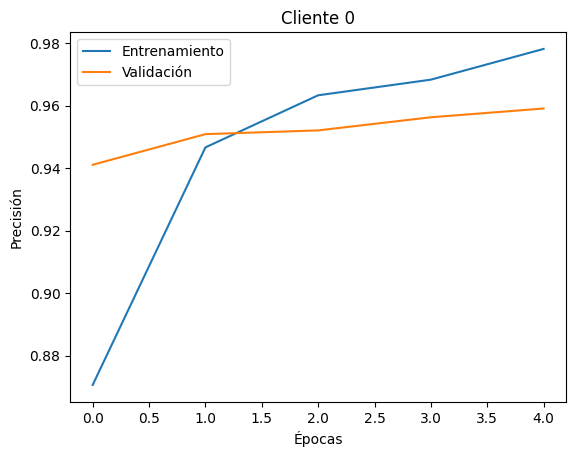

In [6]:
# Curva de aprendizaje
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.title(f"Cliente {cliente_id}")
plt.legend()
plt.show()

In [7]:
# Guardar modelo local
model.save(f"client_model_{cliente_id}.keras")